In [168]:
import pandas as pd,numpy as np

In [169]:
df=pd.read_csv('IMDb Movies India.csv',encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [170]:
df.shape

(15509, 10)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [172]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [173]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [174]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [175]:
df.dropna(inplace=True)

In [176]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [177]:
df['Year']=df['Year'].str.extract('(\d+)')
df['Year']=pd.to_numeric(df['Year'])
df['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [178]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'])

In [179]:
genre=df['Genre']
genre.head(5)

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [180]:
genres=genre.str.split(',',expand=True)
genres.tail()

,0,1,2
15493,Drama,None,None
15494,Biography,Drama,History
15503,Action,Crime,Drama
15505,Action,Drama,None
15508,Action,Drama,None


In [181]:
genre_count={}
for g in genres.values.flatten():
    if g is not None:
        if g in genre_count:
            genre_count[g] +=1
        else:
            genre_count[g] =1

genreCounts={genre: count for genre,count in sorted(genre_count.items())}
for g,c in genreCounts.items():
    print(f'{g} : {c}')
    

 Action : 34
 Adventure : 172
 Biography : 31
 Comedy : 355
 Crime : 604
 Drama : 1954
 Family : 364
 Fantasy : 115
 History : 91
 Horror : 74
 Music : 50
 Musical : 322
 Mystery : 245
 News : 1
 Romance : 1221
 Sci-Fi : 28
 Sport : 38
 Thriller : 590
 War : 30
 Western : 1
Action : 1652
Adventure : 105
Animation : 40
Biography : 84
Comedy : 989
Crime : 271
Documentary : 48
Drama : 1842
Family : 52
Fantasy : 31
History : 8
Horror : 128
Music : 3
Musical : 90
Mystery : 59
Romance : 159
Sci-Fi : 4
Sport : 2
Thriller : 89
War : 3


In [182]:
genrePie=df['Genre'].value_counts()
genrePie.head()

Genre
Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: count, dtype: int64

In [183]:
genrePie=pd.DataFrame(list(genrePie.items()))
genrePie.rename(columns={0:'genre',1:'count'},inplace=True)
genrePie.head()

,genre,count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


In [184]:
df['Votes']=df['Votes'].str.replace(',','')

In [185]:
df['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: object

In [186]:
df['Director'].nunique()

2431

In [187]:
df['Director'].value_counts().head()

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: count, dtype: int64

In [188]:
actors=pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']]).dropna().value_counts()
actors.head()

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Name: count, dtype: int64

In [189]:
import seaborn as sns ,matplotlib.pyplot as plt

In [190]:
df.head(6)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


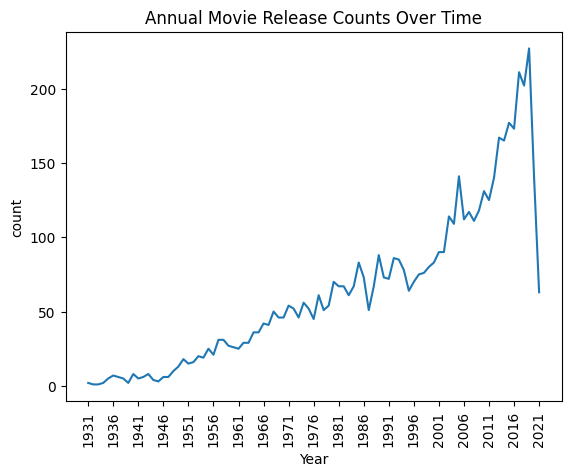

In [191]:
ax=sns.lineplot(data=df['Year'].value_counts())
p=range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(p)
ax.set_xticklabels(p,rotation=90)
plt.show()

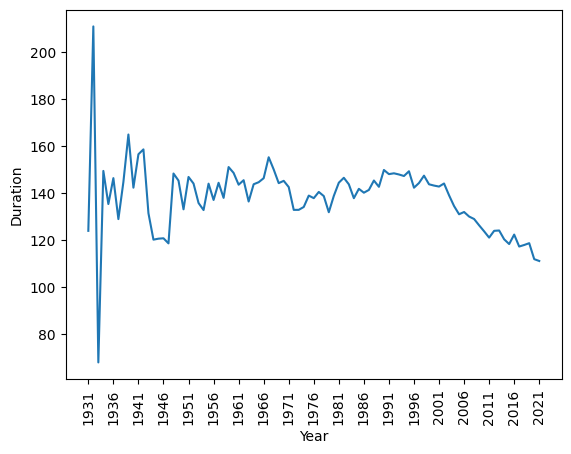

In [192]:
ax=sns.lineplot(data=df.groupby('Year')['Duration'].mean().reset_index(),x='Year',y='Duration')
ax.set_xticks(p)
ax.set_xticklabels(p,rotation=90)
plt.show()

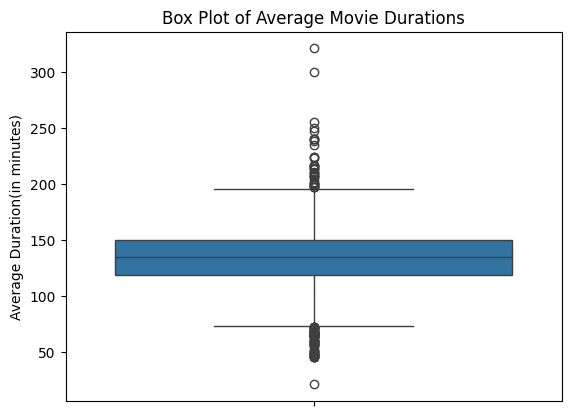

In [193]:
sns.boxplot(data=df,y='Duration')
plt.title('Box Plot of Average Movie Durations')
plt.ylabel('Average Duration(in minutes)')
plt.show()

In [194]:
Q1=df['Duration'].quantile(0.25)
Q3=df['Duration'].quantile(0.75)
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR
df=df[(df['Duration']>=l) & (df['Duration']<=u)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


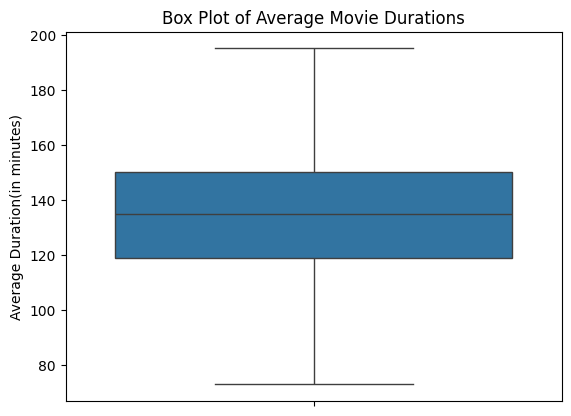

In [195]:
sns.boxplot(data=df,y='Duration')
plt.title('Box Plot of Average Movie Durations')
plt.ylabel('Average Duration(in minutes)')
plt.show()

C:\Users\Get Into Pc\AppData\Local\Temp\ipykernel_38284\787477622.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



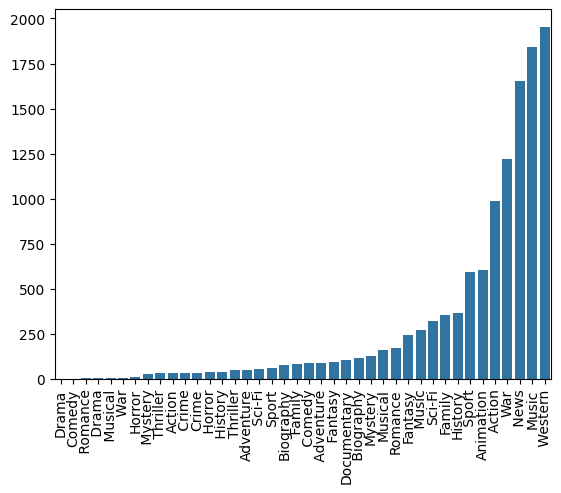

In [196]:
ax=sns.barplot(x=sorted(genre_count.keys()),y=sorted(genre_count.values()))
label=genre_count.keys()
ax.set_xticklabels(label,rotation=90)
plt.show()

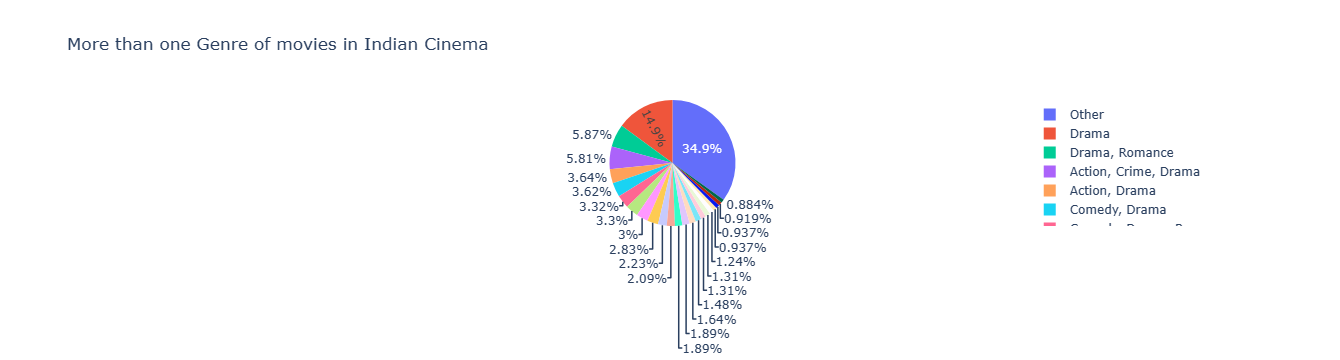

In [197]:
import plotly.express as px
genrePie.loc[genrePie['count'] < 50, 'genre'] = 'Other'
ax=px.pie(genrePie,values='count',names='genre',title='More than one Genre of movies in Indian Cinema')
ax.show()

In [198]:
genrePie.head()

,genre,count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


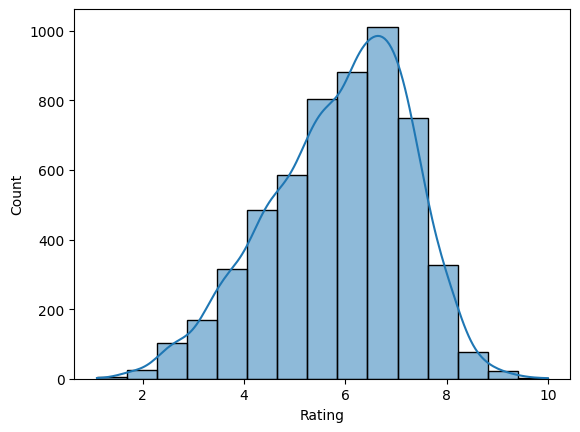

In [199]:
sns.histplot(data=df,x='Rating',bins=15,kde=True)
plt.show()

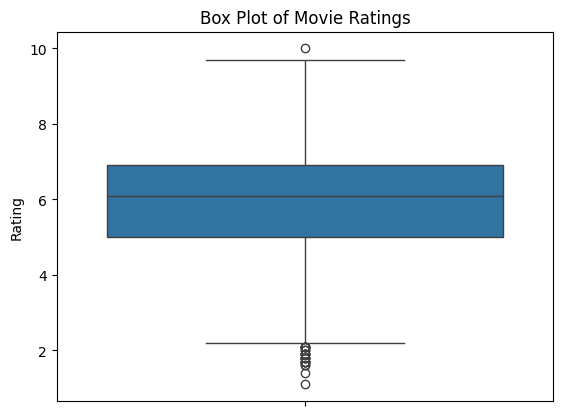

In [200]:
sns.boxplot(data=df,y='Rating')
plt.title('Box Plot of Movie Ratings')
plt.show()

In [201]:
Q1=df['Rating'].quantile(0.25)
Q3=df['Rating'].quantile(0.75)
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR
df=df[(df['Rating']>=l) & (df['Rating']<=u)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


C:\Users\Get Into Pc\AppData\Local\Temp\ipykernel_38284\488781527.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



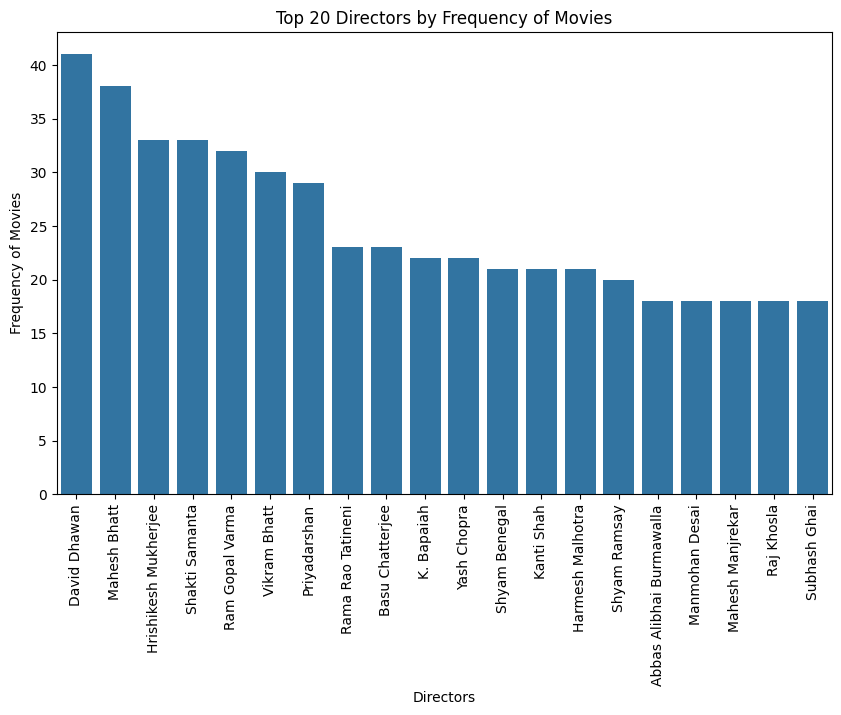

In [211]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=df['Director'].value_counts().head(20).index,y=df['Director'].value_counts().head(20).values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
plt.show()

C:\Users\Get Into Pc\AppData\Local\Temp\ipykernel_38284\3593457108.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



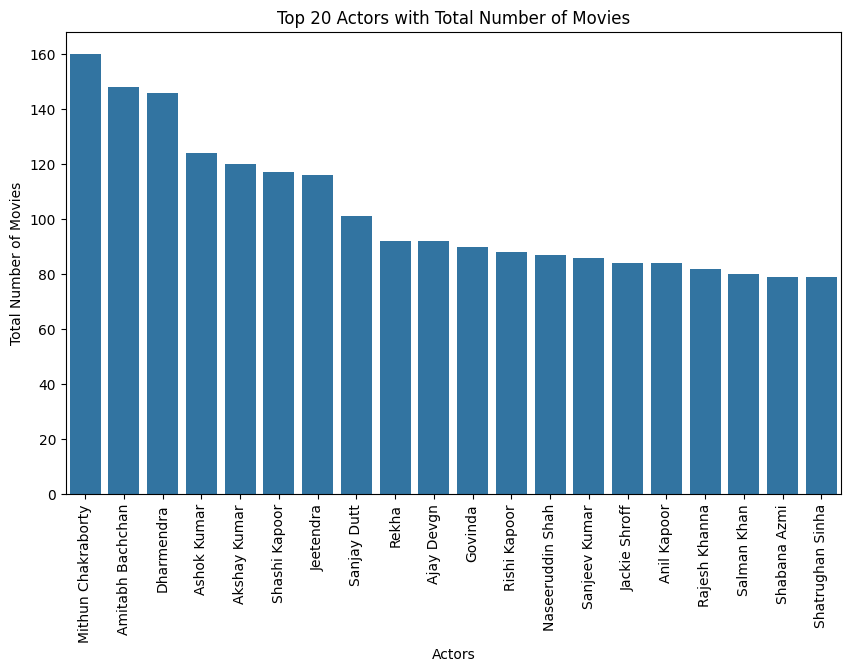

In [214]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=actors.head(20).index,y=actors.head(20).values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
plt.show()

In [217]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
Actor        object
dtype: object

In [221]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df['Directors']=df['Director'].astype('category').cat.codes
df['Genres']=df['Genre'].astype('category').cat.codes
df['Actors']=df['Actor'].astype('category').cat.codes
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,610,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3788
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,1305,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1305,182,3263
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,1493,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1493,155,1091
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,1994,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",1994,283,2036
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,133,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5437


<Axes: ylabel='Genres'>

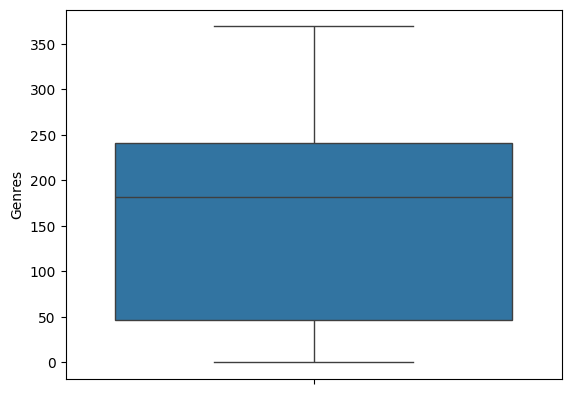

In [222]:
sns.boxplot(y=df['Genres'])

<Axes: ylabel='Directors'>

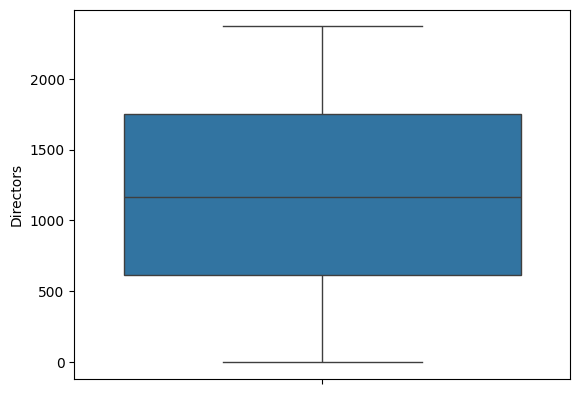

In [223]:
sns.boxplot(y=df['Directors'])

<Axes: ylabel='Actors'>

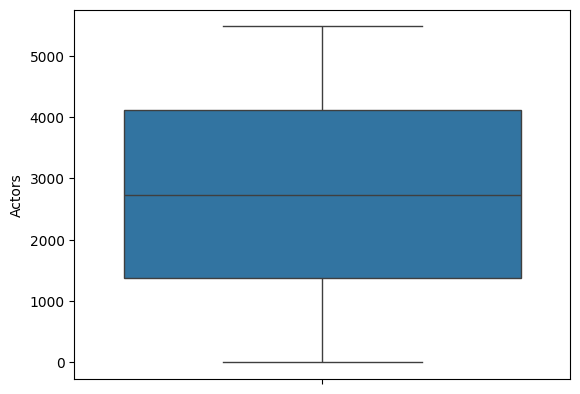

In [224]:
sns.boxplot(y=df['Actors'])

In [227]:
df.dtypes

Name          object
Year           int64
Duration       int64
Genre         object
Rating       float64
Votes         object
Director       int16
Actor 1       object
Actor 2       object
Actor 3       object
Actor         object
Directors      int16
Genres         int16
Actors         int16
dtype: object

In [228]:
x = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
y = df['Rating']

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [251]:
models={'LinearRegression':LinearRegression(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'KNeighborsRegressor':KNeighborsRegressor(n_neighbors=5),
       'RandomForestRegressor':RandomForestRegressor(n_estimators=100,random_state=1), 
       'GradientBoostingRegressor':GradientBoostingRegressor(n_estimators=100,random_state=60)}

In [257]:
for n,m in models.items():
    print('the name of model is ',n,'\n')
    m.fit(x_train,y_train)
    yhat=m.predict(x_test)
    print('the accuracy is ',score(y_test,yhat)*100,'%','\n\n')
    
    

the name of model is  LinearRegression 

the accuracy is  10.691314075266789 % 


the name of model is  DecisionTreeRegressor 

the accuracy is  -28.79293674074612 % 


the name of model is  KNeighborsRegressor 

the accuracy is  1.0878206769869836 % 


the name of model is  RandomForestRegressor 

the accuracy is  36.97113706294878 % 


the name of model is  GradientBoostingRegressor 

the accuracy is  39.2276793558082 % 


